In [2]:
# Verify pytorch is installed correctly
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.5650, 0.7573, 0.3070],
        [0.7201, 0.0792, 0.8860],
        [0.9115, 0.4237, 0.2501],
        [0.3625, 0.9600, 0.2241],
        [0.0346, 0.0497, 0.7153]])


## Machine Learning 
### Machine Learning is making the computer learn from studying data and statistics.
### Machine Learning is a step into the direction of artificial intelligence (AI).
### Machine Learning is a program that analyses data and learns to predict the outcome

## Linear regression with Pytorch 
### https://pytorch.org/docs/stable/index.html
### https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e
### https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817
### https://www.geeksforgeeks.org/linear-regression-using-pytorch/

In [1]:
# PyTorch is an optimized tensor library for deep learning using GPUs and CPUs.
# In mathematics, a tensor is an algebraic object that describes a (multilinear) relationship between sets of algebraic objects related to a vector space. 

# Linear Regression is an approach that tries to find a linear relationship 
# between a dependent variable and an independent variable by minimizing the distance

#### 1. Create Data Set, y = 2X +1 

In [5]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)] # zero to 10
x_train = np.array(x_values, dtype=np.float32)
print(x_train)
# reshape with (-1, 1) . We have provided column as 1 but rows as unknown . So we get result new shape as (11, 1).
x_train = x_train.reshape(-1, 1) 
print(x_train)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [13]:
print(x_values, y_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


In [ ]:
print(x_train, y_train)

2.0 1.0


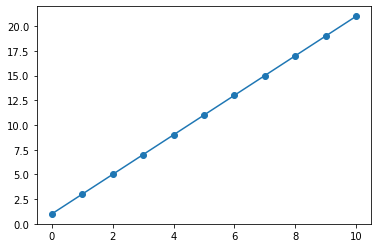

In [17]:
## Linear Regression with scipy 
import matplotlib.pyplot as plt
from scipy import stats

slope, y_intercept, r, p, std_err = stats.linregress(x_values, y_values)
print(slope,y_intercept)

def myfunc(x):
  return slope * x + y_intercept

mymodel = list(map(myfunc, x_values))

plt.scatter(x_values, y_values)
plt.plot(x_values, mymodel)
plt.show()

#### 2. Define Linear Regression Model inherits PyTorch 

In [19]:
class linearRegression(torch.nn.Module): # Inherit torch neutral network Module
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__() # Call base class constructor 
        self.linear = torch.nn.Linear(inputSize, outputSize) # Call base class method 

    def forward(self, x):
        out = self.linear(x)
        return out

#### 3. Instantiate the model 

In [7]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 200

model = linearRegression(inputDim, outputDim)

##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

#initialize 
#loss (Mean Squared Error)  
#optimization (Stochastic Gradient Descent) functions that we’ll use in the training of this model.
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

#### 4. Train the model 

In [8]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(50.2394, grad_fn=<MseLossBackward>)
epoch 0, loss 50.23941421508789
tensor(4.2483, grad_fn=<MseLossBackward>)
epoch 1, loss 4.248298168182373
tensor(0.4953, grad_fn=<MseLossBackward>)
epoch 2, loss 0.49526986479759216
tensor(0.1875, grad_fn=<MseLossBackward>)
epoch 3, loss 0.18748591840267181
tensor(0.1607, grad_fn=<MseLossBackward>)
epoch 4, loss 0.1607384979724884
tensor(0.1569, grad_fn=<MseLossBackward>)
epoch 5, loss 0.1569325029850006
tensor(0.1550, grad_fn=<MseLossBackward>)
epoch 6, loss 0.15501593053340912
tensor(0.1533, grad_fn=<MseLossBackward>)
epoch 7, loss 0.15327179431915283
tensor(0.1516, grad_fn=<MseLossBackward>)
epoch 8, loss 0.15155892074108124
tensor(0.1499, grad_fn=<MseLossBackward>)
epoch 9, loss 0.14986656606197357
tensor(0.1482, grad_fn=<MseLossBackward>)
epoch 10, loss 0.14819304645061493
tensor(0.1465, grad_fn=<MseLossBackward>)
epoch 11, loss 0.14653806388378143
tensor(0.1449, grad_fn=<MseLossBackward>)
epoch 12, loss 0.14490166306495667
tensor(0.1433,

#### 5. Linear Regression Model is trained, let’s test it

[[ 0.7522009]
 [ 2.7878861]
 [ 4.8235717]
 [ 6.8592567]
 [ 8.894942 ]
 [10.930628 ]
 [12.966312 ]
 [15.001998 ]
 [17.037683 ]
 [19.073368 ]
 [21.109055 ]]


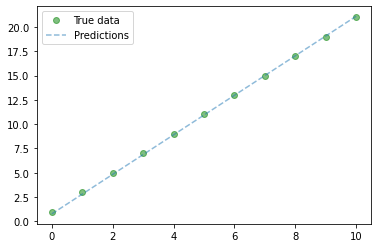

In [9]:
import matplotlib.pyplot as plt
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()